In [17]:
########## LINEARE MODELLIERUNG - SIGNAL PARTIONIERUNG & MEHRERE MODELLE
# Grundsätzliches Problem & Herangehensweise:
#
# PROBLEM: 
# Starkes Signal, welches es schwer macht subtilere Muster zu erkennen
# LÖSUNG: 
# 1. Rausseparieren des starken Signals durch lineares Modell, welches Signal beschreibt
# 2. Betrachten der Residuen = was übrig bleibt = subtilere Muster
#
# INTERPREATION:
# Residual = 1 bedeutet, dass y um eine Einheit geringer ist als die
#                        Vorhersage, welche nur auf rausseparierter Variable basierte 


#### MEHRERE MODELLE
# Idee:
# - mehrere einfache Modelle um komplexere Datensätze zu verstehen
# - list-columns zur Speicherung von beliebigen Strukturen in Dataframes
# - broom um Modelle in tidy-data zu transformieren, um die Resultate der Modelle zu speichern

In [2]:
install.packages('gapminder')

Installing package into ‘/usr/local/spark-2.4.3-bin-hadoop2.7/R/lib’
(as ‘lib’ is unspecified)


In [3]:
library(tidyverse)
library(broom)
library(modelr)  
library(lubridate)
library(gapminder)
library(gridExtra)

options(repr.plot.width=5, repr.plot.height=3)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



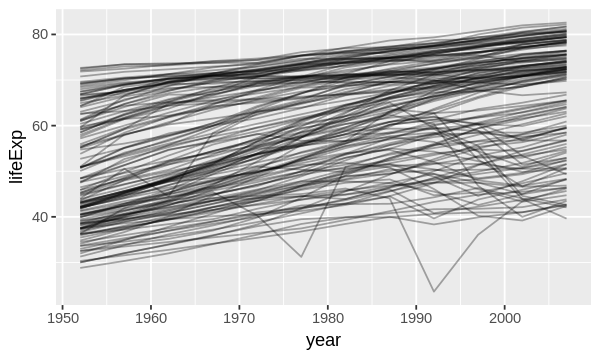

In [5]:
#### MEHRERE MODELLE
# Beispiel:  
# “How does life expectancy (lifeExp) change over time (year) 
#  for each country (country)?”

gapminder %>%
  ggplot(aes(year, lifeExp, group = country)) +
  geom_line(alpha = 1/3)

# => einige haben anderes Muster
# => schwer zu sehen: Haupttrend scheint zu sein, dass Lebenserwartung steigt
#    Aber bei einigen Ländern offensichtlich nicht


# PROBLEM:
# Starkes Muster, welches es problematisch macht die subtileren Muster zu sehen

# Lösung: 
# Lineares Modell bauen, welches starkes Muster beschreibt 
# => für jedes Land anwenden & überprüfen was übrig bleibt in den Residuen

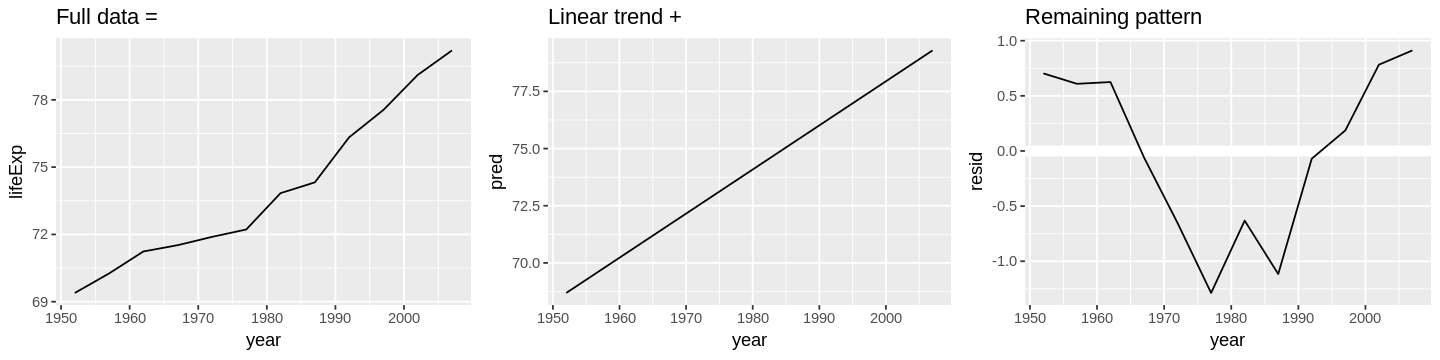

In [7]:
### SIGNAL-PARTITIONIERUNG

## Für ein Land: Original-Daten = Linearer Trend + überbleibendes Muster
nz <- filter(gapminder, country == "New Zealand")
p1 <- nz %>%
  ggplot(aes(year, lifeExp)) +
  geom_line() +
  ggtitle("Full data = ")

## Modell Bauen
nz_mod <- lm(lifeExp ~ year, data = nz)

p2 <- nz %>%
  add_predictions(nz_mod) %>%
  ggplot(aes(year, pred)) +
  geom_line() +
  ggtitle("Linear trend + ")

p3 <- nz %>%
  add_residuals(nz_mod) %>%
  ggplot(aes(year, resid)) +
  geom_hline(yintercept = 0, color = "white", size = 3) +
  geom_line() +
  ggtitle("Remaining pattern")

options(repr.plot.width=12, repr.plot.height=3)
grid.arrange(p1, p2, p3, ncol=3)

In [11]:
### ANSATZ: NESTING
## Zentrale Verwaltung durch: einen Dataframe => alles reinpacken 
# Alles direkt nebeneinander, ist Stärke von Dataframe für diese Vorgehensweise (vs einzelne Objekte)
# => keine synchronisation notwendig(!), wenn man filter() oder arrange() aufruft

### NESTING
# Nested Dataframe benutzen
gapminder
gapminder %>% group_by(country, continent) %>% head() # vs..

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959
Afghanistan,Asia,1992,41.674,16317921,649.3414


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [34]:
gapminder %>% group_by(country, continent) %>% nest() %>% head(2)
# => erzeugt eine Reihe pro Gruppe 
#    Spalte "data" enthät die Dataframe

country,continent,data
<fct>,<fct>,<list>
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02"
Albania,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 55.230, 59.280, 64.820, 66.220, 67.690, 68.930, 70.420, 72.000, 71.581, 72.950, 75.651, 76.423, 1282697.000, 1476505.000, 1728137.000, 1984060.000, 2263554.000, 2509048.000, 2780097.000, 3075321.000, 3326498.000, 3428038.000, 3508512.000, 3600523.000, 1601.056, 1942.284, 2312.889, 2760.197, 3313.422, 3533.004, 3630.881, 3738.933, 2497.438, 3193.055, 4604.212, 5937.030"


In [50]:
#### Modell für jedes Land fitten
by_country <- gapminder %>%
  group_by(country, continent) %>%
  nest()

# Zugriff auf data spalte
by_country$data[[1]]  # => jede Reihe ist eine Gruppe (vs Beobachtung)

year,lifeExp,pop,gdpPercap
<int>,<dbl>,<int>,<dbl>
1952,28.801,8425333,779.4453
1957,30.332,9240934,820.8530
1962,31.997,10267083,853.1007
1967,34.020,11537966,836.1971
1972,36.088,13079460,739.9811
1977,38.438,14880372,786.1134
1982,39.854,12881816,978.0114
1987,40.822,13867957,852.3959
1992,41.674,16317921,649.3414


In [51]:
## Funktion zum fitten eines(!) Modells
# => kann dann auf durch map auf alle nested dataframes angewendet werden
country_model <- function(df) {
  lm(lifeExp ~ year, data = df)
}

# Dataframes sind einer Liste, deshalb purrr::map() 
models <- map(by_country$data, country_model)
models[1:2]

[[1]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -507.5343       0.2753  


[[2]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -594.0725       0.3347  



In [59]:
# Keine synchronisation notwendig, wenn man filter() oder arrange() aufruft
by_country <- by_country %>%
  mutate(model = map(data, country_model))

#by_country
#by_country %>% filter(continent == "Europe")
#by_country %>% arrange(continent, country)
# => durch ein zentralen Dataframe kein reordern von indizes

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


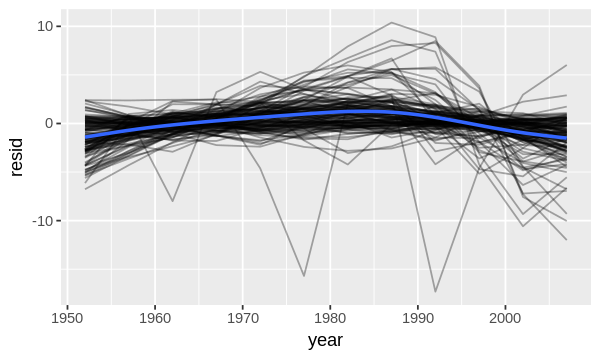

In [37]:
## UNNESTING - um plots der dataframes zu machen

# Um add-residuals() aufzurufen, muss es 
# auf jedes nested model-data Paar angewandt werden
by_country <- by_country %>%
  mutate(resids = map2(data, model, add_residuals))
#by_country

resids <- unnest(by_country, resids) 
#resids

resids %>%
  ggplot(aes(year, resid)) +
  geom_line(aes(group = country), alpha = 1 / 3) +
  geom_smooth(se = FALSE)

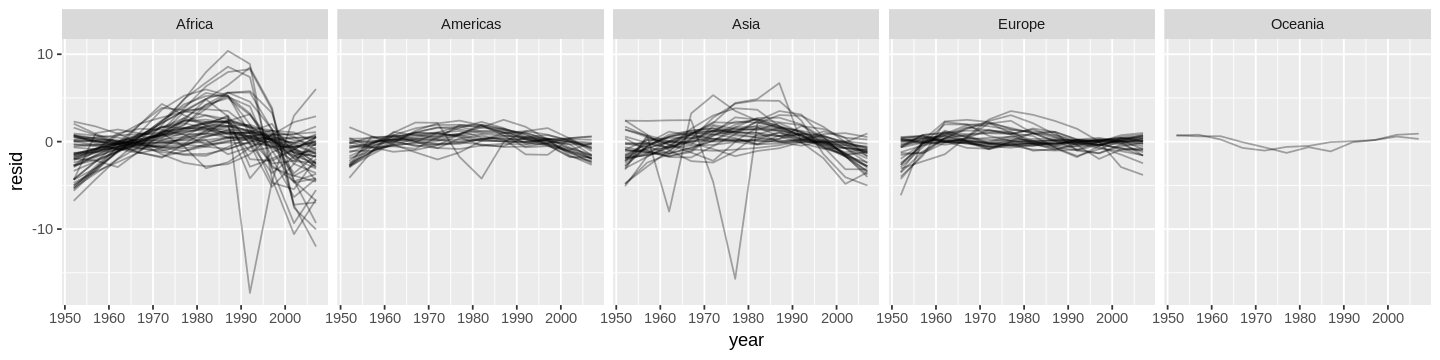

In [54]:
# Faceting nach country gibt mehr Informationen
options(repr.plot.width=12, repr.plot.height=3)
resids %>%
  ggplot(aes(year, resid, group = country)) +
  geom_line(alpha = 1 / 3) +
  facet_wrap(~continent,ncol = 5)
# => Afrika zeigt große Residuen

In [44]:
### Anstatt grafisch => Goodness of fit
# Broom für Metriken für Modell-Qualität verwenden

## Für ein Land
glance(nz_mod) 

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.9535846,0.9489431,0.8043472,205.4459,5.407324e-08,2,-13.32064,32.64128,34.096,6.469743,10


In [47]:
## Für jedes Land
model_quality <- by_country %>%
  mutate(glance = map(model, broom::glance)) %>%
  unnest(glance, .drop=T) 
# Drop => ander list-columns nicht mit reinnehmen

## model_quality
## Nach r^2 sortieren
model_quality %>%
  arrange(r.squared) %>%
  head(3)

country,continent,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Rwanda,Africa,0.01715964,-0.08112440,6.558269,0.1745923,0.6848927,2,-38.50205,83.00411,84.45883,430.1090,10
Botswana,Africa,0.03402340,-0.06257426,6.112177,0.3522177,0.5660414,2,-37.65673,81.31346,82.76818,373.5871,10
Zimbabwe,Africa,0.05623196,-0.03814484,7.205431,0.5958240,0.4580290,2,-39.63135,85.26271,86.71743,519.1823,10


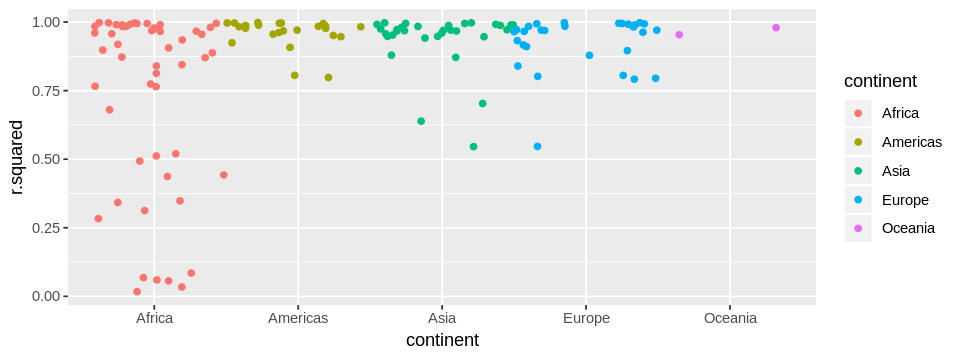

In [57]:
## Fits grafisch anzeigen
options(repr.plot.width=8, repr.plot.height=3)

model_quality %>%
  ggplot(aes(continent, r.squared,color=continent)) +
  geom_jitter(width = 0.5)

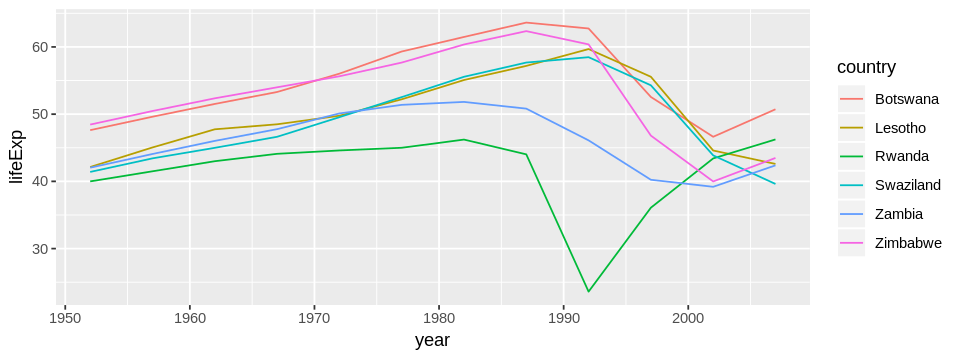

In [58]:
## Besonders schlechte fits anzeigen
bad_fit <- filter(model_quality, r.squared < 0.25)
gapminder %>%
  semi_join(bad_fit, by = "country") %>%
  ggplot(aes(year, lifeExp, color = country)) +
  geom_line()
# => main effects: HIV/AIDS und Rhuanda 